In [15]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from scipy.stats import sem
import matplotlib.cm as cm
from configs import engram_dir

# Helper functions for gathering data

In [16]:
def smooth(xs, ys, n=3):
    vals = np.copy(ys)
    smoothed = np.convolve(ys, np.ones(n)/n, mode='same')
    vals[1:-1] = smoothed[1:-1]
    return vals

In [17]:
def get_df(base, z, pfiles, net_yaml):
    data = {
        'valid_score': [], 'valid_steps':[], 'dims': [],
        'episode': [], 'model': [], 'z': [], 'step': [],
        'model_iter': []}
    for pickle_file in pfiles:
        with open(pickle_file, 'rb') as f:
            results = pickle.load(f)
        valid_score = results['valid_score']
        valid_steps = results['valid_steps_per_ep']
        episode = results['episode']
        model = results['model']
        step = results['step']
        for i in range(len(valid_score)):
            if valid_score[i] == None: continue
            data['valid_score'].append(valid_score[i])
            data['valid_steps'].append(valid_steps[i])
            data['dims'].append(z)
            data['episode'].append(episode[i])
            _model = model[i].split(base+'_')[-1]
            data['model'].append(_model)
            data['z'].append(z)
            data['step'].append(step[i])
            data['model_iter'].append(results['model_iter'][i])
    df = pd.DataFrame(data)
    return df

In [18]:
def find_model_directories(directory_path, model):
    all_files_dirs = os.listdir(directory_path)
    pattern = f'\\b{model}(\\d*)\\b'  # Using word boundaries to ensure complete matches
    matches = [re.search(pattern, item) for item in all_files_dirs]
    
    # Filter out None values (i.e., items that didn't match) and return a list of tuples
    return [(match.group(0), int(match.group(1)) if match.group(1) else None) for match in matches if match]

# Helper functions for plotting

In [19]:
def plot(df, models, savename=None, figsize=(6.4*0.75, 4.8*0.75)):
    colors = cm.get_cmap('Oranges')
    c_steps = np.linspace(0.4, 0.8, 4, endpoint=True)
    colors= ['C0', 'C2'] + [colors(c_steps[i]) for i in range(4)]
    new_df = df.copy()
    smooth_line = True
    new_df['episode'] = new_df['episode']//5*5
    episodes = np.unique(new_df['episode'])
    fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)
    for _idx, model in enumerate(models):
        means = []
        sems = []
        for ep in episodes:
            vals = new_df[(new_df['model']==model) & (new_df['episode']==ep)]
            vals = vals['valid_score']
            means.append(np.mean(vals))
            sems.append(sem(vals))
        means = np.array(means)
        sems = np.array(sems)
        mean_lowerbound = means - sems
        mean_upperbound = means + sems

        smooth_n = 5
        means = smooth(episodes, means, smooth_n)
        mean_lowerbound = smooth(episodes, mean_lowerbound)
        mean_upperbound = smooth(episodes, mean_upperbound)

        ax.plot(episodes[:-smooth_n], means[:-smooth_n], label=model, color=colors[_idx])
        ax.fill_between(
            episodes[:-smooth_n], mean_lowerbound[:-smooth_n],
            mean_upperbound[:-smooth_n], alpha=0.4, color=colors[_idx])
    plt.ylabel('Episode Score')
    plt.xlabel('Training Steps')
    #plt.tight_layout()
    if savename is not None:
        plt.savefig(savename + '.png', dpi=300, transparent=True)
    plt.show()

# Initial Gridworld Experiment

In [32]:
base = 'cifar_gridworld_8x8'
net_yaml = 'dm'
z = 6

In [33]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

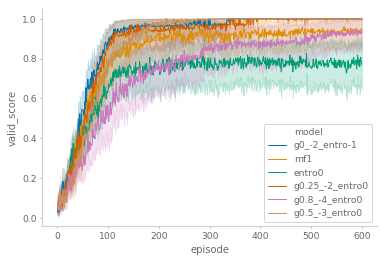

In [34]:
_df = df
sns.lineplot(
    x='episode', hue='model', y='valid_score',
    data=_df)

# Initial Gridworld Experiment

In [24]:
base = 'cifar_gridworld_8x8'
net_yaml = 'dm'
z = 4

In [25]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

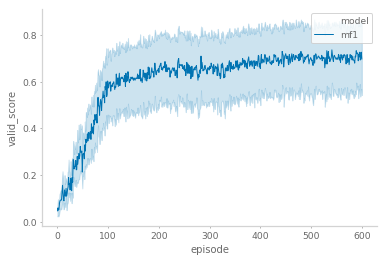

In [26]:
_df = df[df['model'].str.startswith('mf')]
sns.lineplot(
    x='episode', hue='model', y='valid_score',
    data=_df)

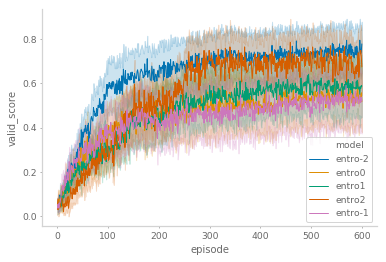

In [27]:
_df = df[df['model'].str.startswith('entro')]
sns.lineplot(
    x='episode', hue='model', y='valid_score',
    data=_df)

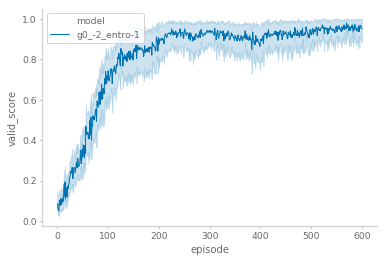

In [28]:
_df = df[df['model'].str.startswith('g0_')]
sns.lineplot(
    x='episode', hue='model', y='valid_score',
    data=_df)

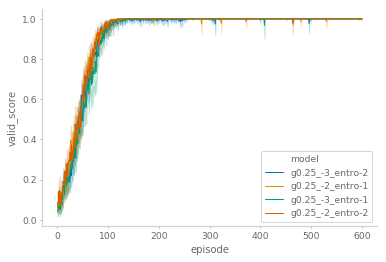

In [66]:
_df = df[df['model'].str.startswith('g0.25_')]
sns.lineplot(
    x='episode', hue='model', y='valid_score',
    data=_df)

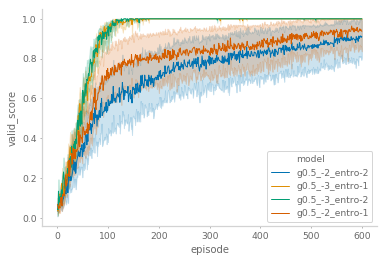

In [67]:
_df = df[df['model'].str.startswith('g0.5_')]
sns.lineplot(
    x='episode', hue='model', y='valid_score',
    data=_df)

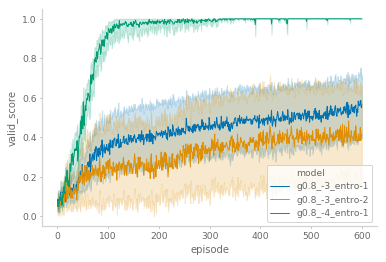

In [68]:
_df = df[df['model'].str.startswith('g0.8_')]
sns.lineplot(
    x='episode', hue='model', y='valid_score',
    data=_df)

# Initial Gridworld Experiment

In [93]:
base = 'pomdp_test'
net_yaml = 'dm'
z = 32

In [94]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

(0, 380.8975)

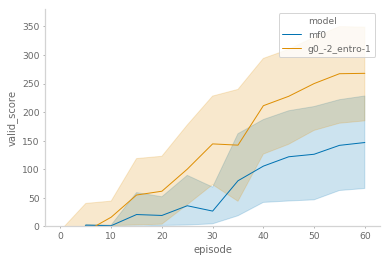

In [95]:
_df = df
sns.lineplot(
    x='episode', hue='model', y='valid_score',
    data=_df)
plt.ylim(0)

# Initial Gridworld Experiment

In [97]:
base = 'pomdp_test'
net_yaml = 'dm'
z = 64

In [98]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

(0, 450.117125)

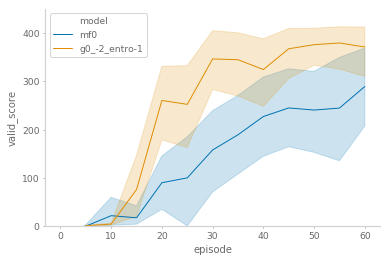

In [99]:
_df = df
sns.lineplot(
    x='episode', hue='model', y='valid_score',
    data=_df)
plt.ylim(0)

# Initial Gridworld Experiment

In [106]:
base = 'stochastic_gridworld_p0.25_global'
net_yaml = 'dm'
z = 10

In [107]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

(0, 1.0320041666666666)

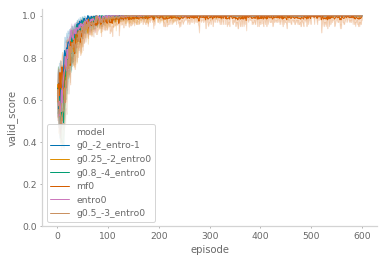

In [108]:
_df = df
sns.lineplot(
    x='episode', hue='model', y='valid_score',
    data=_df)
plt.ylim(0)

# Initial Gridworld Experiment

In [54]:
base = 'new_gridworld8x8_shuffobs'
net_yaml = 'dm'
z = 9

In [55]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

(0, 1.0496666666666667)

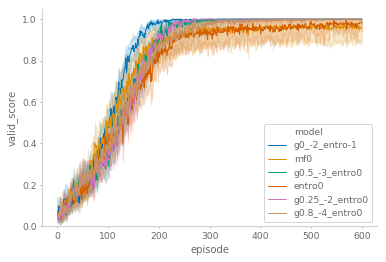

In [56]:
_df = df
sns.lineplot(
    x='episode', hue='model', y='valid_score',
    hue_order=['g0_-2_entro-1', 'mf0', 'g0.5_-3_entro0', 'entro0',
              'g0.25_-2_entro0', 'g0.8_-4_entro0'],
    data=_df)
plt.ylim(0)